In [1]:
import os
import pandas as pd
import numpy as np
import requests
import json
import glob
import re

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from monty.serialization import loadfn

In [3]:
d_dir = './FastCharge/data-share/features/DeltaQFastCharge' # Directory for DeltaQFastCharge
t_dir = './FastCharge/data-share/features/TrajectoryFastCharge' # Directory for TrajectoryFastCharge
struct_dir = "./data/FastCharge" # Directory for Structured files

In [4]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if ".json" in fullPath:
            allFiles.append(fullPath)
    return allFiles

### Getting Features

In [5]:
d_list = getListOfFiles(d_dir)
print(len(d_list))
d_list

139


['./FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000000_CH19_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000001_CH16_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000001_CH30_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000001_CH38_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000002_CH10_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000002_CH18_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000002_CH2_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000002_CH34_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge\\FastCharge_000002_CH42_features_DeltaQFastCharge.json',
 './FastCharge/data-

In [6]:
d_df = pd.DataFrame()
for file in d_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        d_df = pd.concat([d_df,data_df])
d_df.reset_index(drop=True,inplace=True)
d_df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_cycle_2,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles
0,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0454259],[0.8891461000000003],[1.0331815],[231072.4263671875],[614.4000244140625],[-1.1444158302992298],...,[0.017864122986793518],[-0.0010415539145469666],[1.047977],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,10,91,100,40
1,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0620247999999999],[0.48970650000000004],[1.0439155],[149767.85131961218],[563.2000122070312],[-1.2773591296554208],...,[0.013516996055841446],[0.0003414759412407875],[1.06011365],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,10,91,100,40
2,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0678786],[0.4961450999999999],[1.054091],[205315.4877278646],[614.4000244140625],[-1.3752393675218624],...,[0.013937968760728836],[0.00024036318063735962],[1.06736225],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,10,91,100,40
3,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0512739],[0.49011190000000004],[1.0341983000000001],[159799.4890051929],[563.2000122070312],[-1.2430890844325302],...,[0.013172633945941925],[0.00042933784425258636],[1.05098615],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,10,91,100,40
4,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0665728],[0.47571469999999993],[1.0695093],[146029.5250360061],[614.4000244140625],[-1.640443517452452],...,[0.015434841625392437],[-0.0001586293801665306],[1.0708095],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,10,91,100,40


In [7]:
new_names = []
for file in d_list:
    new_names.append(re.findall("_0000(.*?)\_f", file)[0])
# new_names

In [8]:
d_df['bat_name'] = new_names

In [9]:
d_df

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles,bat_name
0,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0454259],[0.8891461000000003],[1.0331815],[231072.4263671875],[614.4000244140625],[-1.1444158302992298],...,[-0.0010415539145469666],[1.047977],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,10,91,100,40,00_CH19
1,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0620247999999999],[0.48970650000000004],[1.0439155],[149767.85131961218],[563.2000122070312],[-1.2773591296554208],...,[0.0003414759412407875],[1.06011365],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,10,91,100,40,01_CH16
2,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0678786],[0.4961450999999999],[1.054091],[205315.4877278646],[614.4000244140625],[-1.3752393675218624],...,[0.00024036318063735962],[1.06736225],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,10,91,100,40,01_CH30
3,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0512739],[0.49011190000000004],[1.0341983000000001],[159799.4890051929],[563.2000122070312],[-1.2430890844325302],...,[0.00042933784425258636],[1.05098615],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,10,91,100,40,01_CH38
4,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0665728],[0.47571469999999993],[1.0695093],[146029.5250360061],[614.4000244140625],[-1.640443517452452],...,[-0.0001586293801665306],[1.0708095],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,10,91,100,40,02_CH10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0682162],[0.8877553],[1.0767563999999998],[233369.17722981772],[588.7999877929688],[-1.3932129358183354],...,[-0.0003258492797613144],[1.07693975],el150800460610,2017-06-30_tests\20170630-4_9C_61per_4_5C.sdu,24,10,91,100,40,69_CH25
135,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0661633],[0.8867498999999999],[1.0732728999999999],[231731.72559000654],[640.0],[-1.4001766022889475],...,[-0.00021851062774658203],[1.07508665],el150800460613,2017-06-30_tests\20170630-6C_4per_4_75C.sdu,45,10,91,100,40,70_CH46
136,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0743777],[0.8883315],[1.0861666],[228614.76012369792],[614.4000244140625],[-1.250445968607848],...,[6.786175072193146e-05],[1.085482],el150800460627,2017-06-30_tests\20170630-5_6C_58per_3_5C.sdu,39,10,91,100,40,71_CH40
137,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0758885],[0.8921306000000002],[1.0844604],[234874.82225341798],[588.7999877929688],[-1.2957790575728785],...,[6.156414747238159e-05],[1.0844260000000001],el150800460641,2017-06-30_tests\20170630-5_2C_58per_4C.sdu,33,10,91,100,40,72_CH34


### Response variable data

In [10]:
t_list = getListOfFiles(t_dir)
print(len(t_list))
t_list

139


['./FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000000_CH19_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000001_CH16_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000001_CH30_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000001_CH38_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000002_CH10_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000002_CH18_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000002_CH2_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastCharge_000002_CH34_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge\\FastChar

In [11]:
t_df = pd.DataFrame()
for file in t_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        t_df = pd.concat([t_df,data_df])
t_df.reset_index(inplace=True)
t_df.head()

,index,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[127],[269],[376],[423],[449],[467],[483],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[125],[276],[426],[528],[613],[668],[668],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[774],[774],[774],[774],[774],[774],[774],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[543],[543],[543],[543],[543],[543],[543],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1011],[1011],[1011],[1011],[1011],[1011],[1011],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03


In [12]:
df_full = d_df.merge(t_df, left_index=True, right_index=True)

# Making values not stored as lists
for column in df_full.columns:
    if "X." in column:
        df_full[column] = df_full[column].apply(lambda x: x[0])

# df_full.sort_values(by=['bat_name'],inplace=True)
# df_full.reset_index(inplace=True)
df_full

,@module_x,@class_x,name_x,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.045426,0.889146,1.033181,231072.426367,614.400024,-1.144416,...,423,449,467,483,el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.062025,0.489707,1.043915,149767.851320,563.200012,-1.277359,...,528,613,668,668,el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.067879,0.496145,1.054091,205315.487728,614.400024,-1.375239,...,774,774,774,774,el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.051274,0.490112,1.034198,159799.489005,563.200012,-1.243089,...,543,543,543,543,el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.066573,0.475715,1.069509,146029.525036,614.400024,-1.640444,...,1011,1011,1011,1011,el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.068216,0.887755,1.076756,233369.177230,588.799988,-1.393213,...,250,483,503,522,el150800460610,2017-06-30_tests\20170630-4_9C_61per_4_5C.sdu,24,0.98,0.78,0.03
135,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.066163,0.886750,1.073273,231731.725590,640.000000,-1.400177,...,443,462,480,497,el150800460613,2017-06-30_tests\20170630-6C_4per_4_75C.sdu,45,0.98,0.78,0.03
136,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.074378,0.888332,1.086167,228614.760124,614.400024,-1.250446,...,420,435,449,464,el150800460627,2017-06-30_tests\20170630-5_6C_58per_3_5C.sdu,39,0.98,0.78,0.03
137,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.075889,0.892131,1.084460,234874.822253,588.799988,-1.295779,...,472,491,509,527,el150800460641,2017-06-30_tests\20170630-5_2C_58per_4C.sdu,33,0.98,0.78,0.03


### Data with Charge Throughput

In [14]:
s_list = getListOfFiles(struct_dir)
s_list

['./data/FastCharge\\FastCharge_000000_CH19_structure.json',
 './data/FastCharge\\FastCharge_000001_CH16_structure.json',
 './data/FastCharge\\FastCharge_000001_CH30_structure.json',
 './data/FastCharge\\FastCharge_000001_CH38_structure.json',
 './data/FastCharge\\FastCharge_000002_CH10_structure.json',
 './data/FastCharge\\FastCharge_000002_CH18_structure.json',
 './data/FastCharge\\FastCharge_000002_CH26_structure.json',
 './data/FastCharge\\FastCharge_000002_CH2_structure.json',
 './data/FastCharge\\FastCharge_000002_CH34_structure.json',
 './data/FastCharge\\FastCharge_000002_CH42_structure.json',
 './data/FastCharge\\FastCharge_000002_CH47_structure.json',
 './data/FastCharge\\FastCharge_000002_CH7_structure.json',
 './data/FastCharge\\FastCharge_000003_CH39_structure.json',
 './data/FastCharge\\FastCharge_000003_CH40_structure.json',
 './data/FastCharge\\FastCharge_000004_CH1_structure.json',
 './data/FastCharge\\FastCharge_000004_CH2_structure.json',
 './data/FastCharge\\FastCha

In [15]:
charge_throughputs = []
# s_names = []
for file in s_list: 
    with open(file) as data_file:    
        data = json.load(data_file)
        df = pd.DataFrame.from_dict(data['summary'])
#         s_names.append(re.findall("_0000(.*?)\_s", file)[0])
        charge_throughputs.append(df.iloc[-1]['charge_throughput'])

In [16]:
s_names = []
for file in s_list:
    s_names.append(re.findall("_0000(.*?)\_s", file)[0])

In [17]:
s_dict = {'bat_name': s_names, 'charge_throughput': charge_throughputs} 
s_df = pd.DataFrame(s_dict)

In [27]:
with open(s_list[6]) as data_file:
    data = json.load(data_file)
    test_df = pd.DataFrame.from_dict(data['summary'])
    test_df

In [28]:
test_df

,cycle_index,discharge_capacity,charge_capacity,discharge_energy,charge_energy,dc_internal_resistance,temperature_maximum,temperature_average,temperature_minimum,date_time_iso,energy_efficiency,charge_throughput,energy_throughput,charge_duration,time_temperature_integrated,paused
0,0,1.543046,1.054516,4.676918,3.631704,0.084137,33.851879,32.432484,22.175308,2018-04-13T01:27:28+00:00,1.287803,1.054515,3.631704,100864.0,53666.283883,0


In [40]:
s_df[:10]

,bat_name,charge_throughput
0,00_CH19,486.255859
1,01_CH16,659.681458
2,01_CH30,776.911377
3,01_CH38,535.996155
4,02_CH10,1048.040771
5,02_CH18,860.221924
6,02_CH26,1.054515
7,02_CH2,844.456787
8,02_CH34,843.909485
9,02_CH42,1319.382568


In [22]:
s_df['bat_name'].values

array(['00_CH19', '01_CH16', '01_CH30', '01_CH38', '02_CH10', '02_CH18',
       '02_CH26', '02_CH2', '02_CH34', '02_CH42', '02_CH47', '02_CH7',
       '03_CH39', '03_CH40', '04_CH1', '04_CH2', '04_CH3', '05_CH18',
       '06_CH11', '06_CH19', '06_CH27', '06_CH35', '06_CH3', '06_CH43',
       '06_CH48', '06_CH8', '07_CH24', '07_CH39', '08_CH47', '08_CH48',
       '09_CH4', '09_CH7', '09_CH8', '10_CH44', '11_CH26', '12_CH13',
       '12_CH15', '12_CH21', '12_CH23', '12_CH29', '12_CH37', '12_CH45',
       '12_CH5', '13_CH13', '13_CH14', '14_CH23', '14_CH24', '15_CH12',
       '15_CH14', '15_CH20', '15_CH22', '15_CH28', '15_CH36', '15_CH44',
       '15_CH4', '16_CH17', '17_CH17', '17_CH1', '17_CH25', '17_CH33',
       '17_CH41', '17_CH46', '17_CH6', '17_CH9', '18_CH18', '19_CH29',
       '19_CH30', '20_CH23', '21_CH28', '22_CH24', '23_CH37', '23_CH38',
       '24_CH45', '25_CH7', '26_CH5', '26_CH6', '27_CH31', '28_CH19',
       '28_CH20', '29_CH10', '29_CH9', '30_CH30', '31_CH9', '32_CH22'

In [21]:
df_full[['bat_name']].values

array([['00_CH19'],
       ['01_CH16'],
       ['01_CH30'],
       ['01_CH38'],
       ['02_CH10'],
       ['02_CH18'],
       ['02_CH2'],
       ['02_CH34'],
       ['02_CH42'],
       ['02_CH47'],
       ['02_CH7'],
       ['03_CH39'],
       ['03_CH40'],
       ['04_CH1'],
       ['04_CH2'],
       ['04_CH3'],
       ['05_CH18'],
       ['06_CH11'],
       ['06_CH19'],
       ['06_CH27'],
       ['06_CH35'],
       ['06_CH3'],
       ['06_CH43'],
       ['06_CH48'],
       ['06_CH8'],
       ['07_CH24'],
       ['07_CH39'],
       ['08_CH47'],
       ['08_CH48'],
       ['09_CH4'],
       ['09_CH7'],
       ['09_CH8'],
       ['10_CH44'],
       ['11_CH26'],
       ['12_CH13'],
       ['12_CH15'],
       ['12_CH21'],
       ['12_CH23'],
       ['12_CH29'],
       ['12_CH37'],
       ['12_CH45'],
       ['12_CH5'],
       ['13_CH13'],
       ['13_CH14'],
       ['14_CH23'],
       ['14_CH24'],
       ['15_CH12'],
       ['15_CH14'],
       ['15_CH20'],
       ['15_CH22'],
       ['15

In [30]:
df_full = df_full.merge(s_df)

In [31]:
df_full = df_full.drop(columns = ['@module_x','@class_x', 'name_x', '@version_x','@module_y', '@class_y', 'name_y', '@version_y'])

In [32]:
df_full.columns

Index(['X.discharge_capacity_cycle_2', 'X.max_discharge_capacity_difference',
       'X.discharge_capacity_cycle_100',
       'X.integrated_time_temperature_cycles_1:100',
       'X.charge_time_cycles_1:5',
       'X.abs_min_discharge_capacity_difference_cycles_2:100',
       'X.abs_mean_discharge_capacity_difference_cycles_2:100',
       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
       'X.abs_skew_discharge_capacity_difference_cycles_2:100',
       'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
       'X.abs_first_discharge_capacity_difference_cycles_2:100',
       'X.max_temperature_cycles_1:100', 'X.min_temperature_cycles_1:100',
       'X.slope_discharge_capacity_cycle_number_2:100',
       'X.intercept_discharge_capacity_cycle_number_2:100',
       'X.slope_discharge_capacity_cycle_number_91:100',
       'X.intercept_discharge_capacity_cycle_number_91:100',
       'X.min_internal_resistance_cycles_2:100',
       'X.internal_resistance_cycle_2',
   

In [39]:
df_full[['charge_throughput','bat_name']].head(10)

,charge_throughput,bat_name
0,486.255859,00_CH19
1,659.681458,01_CH16
2,776.911377,01_CH30
3,535.996155,01_CH38
4,1048.040771,02_CH10
5,860.221924,02_CH18
6,844.456787,02_CH2
7,843.909485,02_CH34
8,1319.382568,02_CH42
9,1987.936890,02_CH47


In [24]:
df_full.to_csv("OldDataFullCT.csv")

Model Recreation

In [79]:
variance_model_features = 'X.abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                            'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                            'X.abs_skew_discharge_capacity_difference_cycles_2:100',
                            'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'X.discharge_capacity_cycle_2',
                            'X.max_discharge_capacity_difference'
                            ]
full_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                       'X.slope_discharge_capacity_cycle_number_2:100',
                       'X.intercept_discharge_capacity_cycle_number_2:100',
                       'X.discharge_capacity_cycle_2',
                       'X.charge_time_cycles_1:5',
                       'X.integrated_time_temperature_cycles_1:100',
                       'X.min_internal_resistance_cycles_2:100',
                       'X.internal_resistance_difference_cycles_2:100']
y = 'X.capacity_0.8'
y_ct = 'charge_throughput'

Variance Model

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

<AxesSubplot:xlabel='X.capacity_0.8'>

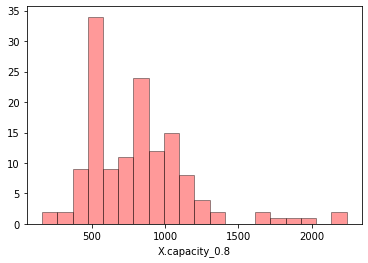

In [38]:
sns.distplot(df_full['X.capacity_0.8'], hist=True, kde=False, color = 'red', bins=int(100/5),
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='charge_throughput'>

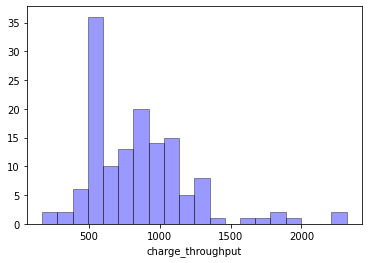

In [36]:
sns.distplot(df_full['charge_throughput'], hist=True, kde=False, color = 'blue', bins=int(100/5),
             hist_kws={'edgecolor':'black'})

In [75]:
print(df_full['X.capacity_0.8'].min())
print(df_full['X.capacity_0.8'].max())

161
2239


In [76]:
print(df_full['charge_throughput'].min())
print(df_full['charge_throughput'].max())

168.58714294433594
2319.266357421875


<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='X.capacity_0.8'>

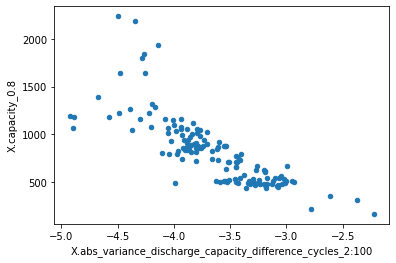

In [77]:
df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'X.capacity_0.8')

<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='charge_throughput'>

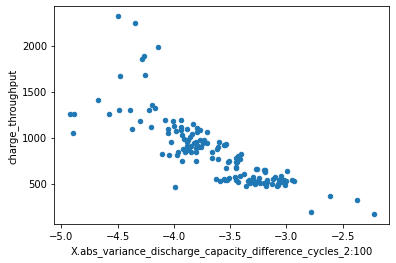

In [78]:
df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'charge_throughput')

In [81]:
train_ind = [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81]
test_ind = [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 83]

### 0.8 capacity as response

In [26]:
# Variance model
X_train = df_full.iloc[train_ind][[variance_model_features]]
y_train = df_full.iloc[train_ind][[y]]

X_test = df_full.iloc[test_ind][[variance_model_features]]
y_test = df_full.iloc[test_ind][[y]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training RMSE:  135.62503334492996
Test RMSE:  127.88180518799861
Mean % Train Error:  0.1799332569661019
Mean % Test Error:  0.1687358434874134
R2 : 0.7478599261521324


#### From paper (Variance Model)
* Training RMSE: 103
* Test RMSE: 138
* Mean % Train Error: 14.1
* Mean % Test Error: 14.7

In [27]:
# discharge model
X_train = df_full.iloc[train_ind][discharge_model_features]
y_train = df_full.iloc[train_ind][[y]]

X_test = df_full.iloc[test_ind][discharge_model_features]
y_test = df_full.iloc[test_ind][[y]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train))
print("Mean % Error: ", mean_absolute_percentage_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training RMSE:  75.16314536569485
Test RMSE:  89.439963652517
Mean % Train Error:  0.09825945430791481
Mean % Error:  0.11019150889386008
R2 : 0.8766646452121936


#### From paper (Discharge Model)
* Training RMSE: 76
* Test RMSE: 91
* Mean % Train Error: 9.8
* Mean % Test Error: 13.0

In [28]:
# full model
X_train = df_full.iloc[train_ind][full_model_features]
y_train = df_full.iloc[train_ind][[y]]

X_test = df_full.iloc[test_ind][full_model_features]
y_test = df_full.iloc[test_ind][[y]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train))
print("Mean % Error: ", mean_absolute_percentage_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training RMSE:  71.58632659423361
Test RMSE:  112.65973495691283
Mean % Train Error:  0.0826489307190952
Mean % Error:  0.13254246756161037
R2 : 0.8043130746103226


#### From paper (Full Model)
* Training RMSE: 51
* Test RMSE: 118
* Mean % Train Error: 5.6
* Mean % Test Error: 14.1

### Charge Throughput as Response

In [82]:
# Variance model
X_train = df_full.iloc[train_ind][[variance_model_features]]
y_train = df_full.iloc[train_ind][[y_ct]]

X_test = df_full.iloc[test_ind][[variance_model_features]]
y_test = df_full.iloc[test_ind][[y_ct]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training RMSE:  282.9219171385274
Test RMSE:  214.30059910503815
Mean % Train Error:  0.21885733342950436
Mean % Test Error:  0.14850105828362192
R2 : 0.6554110372236094


In [83]:
# discharge model
X_train = df_full.iloc[train_ind][discharge_model_features]
y_train = df_full.iloc[train_ind][[y_ct]]

X_test = df_full.iloc[test_ind][discharge_model_features]
y_test = df_full.iloc[test_ind][[y_ct]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train))
print("Mean % Error: ", mean_absolute_percentage_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training RMSE:  198.98052994567522
Test RMSE:  335.35099101854706
Mean % Train Error:  0.15534125783744412
Mean % Error:  0.1983082949660377
R2 : 0.15617229420425482


In [84]:
# full model
X_train = df_full.iloc[train_ind][full_model_features]
y_train = df_full.iloc[train_ind][[y_ct]]

X_test = df_full.iloc[test_ind][full_model_features]
y_test = df_full.iloc[test_ind][[y_ct]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train))
print("Mean % Error: ", mean_absolute_percentage_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training RMSE:  181.94226670314086
Test RMSE:  215.90088707655812
Mean % Train Error:  0.16966614751526995
Mean % Error:  0.17037614940193774
R2 : 0.6502453912358988
